# Task -1 Anomaly detection
## Student ID1: 315303529
## Student ID2: 315918557
#### We will use Pandas, Numpy, SKLEARN, matplotlib, scipy
#### link to github project: https://github.com/michaelMatve/Network_traffic_anomalies_detection.git

# imports

In [1]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

# scv read 

In [2]:
mydataset = pd.read_csv('conn_attack.csv')

# 1. first we will look at the table for first impression, check size, colums etc.

#### we want to know how many data we need to handle

In [3]:
mydataset.shape

(256670, 4)

#### we look at the features we have in the csv file

In [4]:
#show all the columns we have
mydataset.columns

Index(['record ID', 'Duration', 'src_bytes', 'dst_bytes'], dtype='object')

In [5]:
#show the firest element
mydataset.head()

,record ID,Duration,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


In [6]:
#show the last valuse
mydataset.tail()

,record ID,Duration,src_bytes,dst_bytes
256665,256666,0,306,236
256666,256667,0,288,4017
256667,256668,0,289,1096
256668,256669,0,198,2169
256669,256670,0,212,2288


# 2. we check every feature on his own and try to detect suspicious things

### Duration:

In [7]:
count_durtion = mydataset['Duration'].value_counts()
count_durtion

0      255168
3         122
1         104
5          55
2          43
        ...  
328         1
277         1
314         1
624         1
715         1
Name: Duration, Length: 368, dtype: int64

In [8]:
mydataset['Duration'].min()

0

In [9]:
mydataset['Duration'].max()

3289

In [10]:
mydataset['Duration'].mean()

0.6409358320021817

<AxesSubplot:xlabel='Duration'>

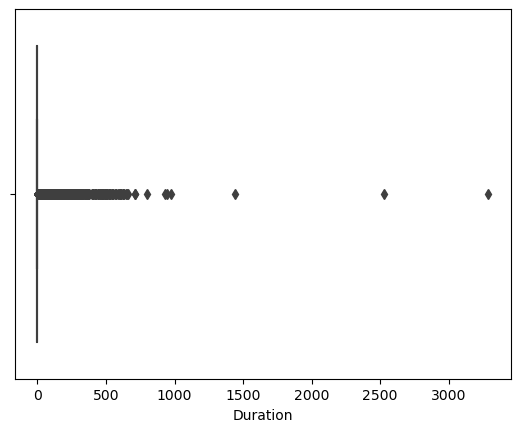

In [11]:
sns.boxplot(x='Duration', data = mydataset)

#### Conclusion: after inspecting the Duration, we notice that most of the records have a duration under ~700, and that the min duration is 0 and the max duration is 3289 while the mean is 0.64 which means that most of the records are around 0 and the records that their Duration is over ~700 are suspicious and might be anomalies

### dst_bytes:

In [12]:
# show all the diffrent values in dst_bytes colum and how many are from each
count_dst = mydataset['dst_bytes'].value_counts()
count_dst

2698     1412
1380     1251
2239     1148
2507     1147
3222     1116
         ... 
21621       1
10101       1
14641       1
28101       1
14180       1
Name: dst_bytes, Length: 17063, dtype: int64

<AxesSubplot:xlabel='dst_bytes', ylabel='count'>

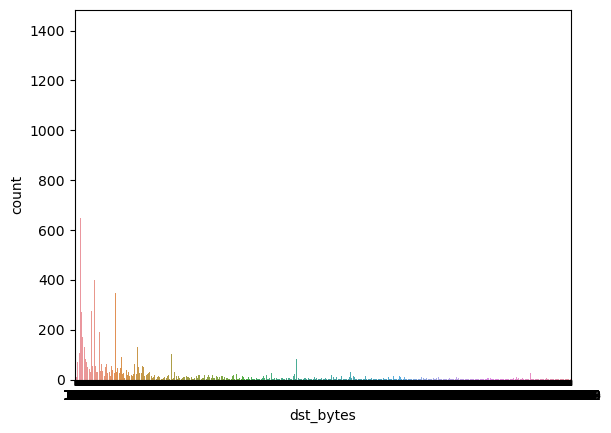

In [13]:
sns.countplot(x='dst_bytes' ,data=mydataset )

In [14]:
mydataset['dst_bytes'].min()

0

In [15]:
mydataset['dst_bytes'].max()

7068759

In [16]:
mydataset['dst_bytes'].mean()

4473.532613862158

<AxesSubplot:xlabel='dst_bytes'>

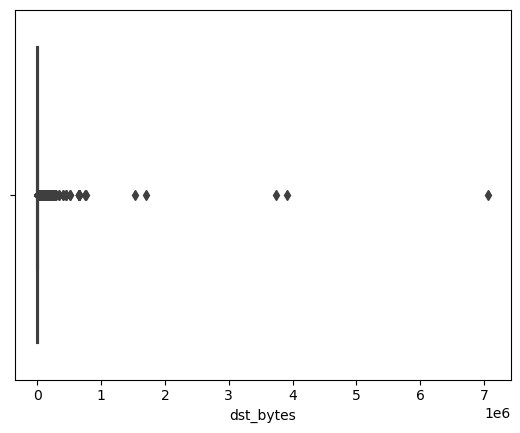

In [17]:
sns.boxplot(x='dst_bytes', data = mydataset)

#### Conclusion: after inspecting the dst_bytes feature we can see that the min is 0, the max is 7068759 and the mean is ~4473 which mean that most of the dst_bytes are no more than 8000 bytes. looking at the graph could also tell us that the records that their dst_bytes are over ~8000 are suspicious and might be anomalies

### src_bytes:

In [18]:
# show all the diffrent values in dst_bytes colum and how many are from each
count_src = mydataset['src_bytes'].value_counts()
count_src

216     2646
221     2614
224     2558
208     2552
215     2546
        ... 
1379       1
9219       1
137        1
520        1
623        1
Name: src_bytes, Length: 473, dtype: int64

<AxesSubplot:xlabel='src_bytes', ylabel='count'>

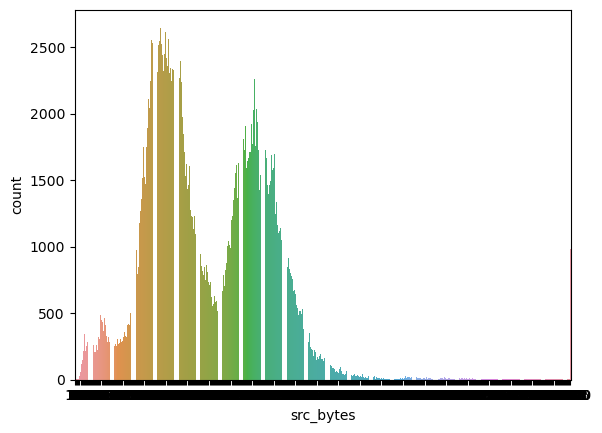

In [19]:
sns.countplot(x='src_bytes' ,data=mydataset )

In [20]:
mydataset['src_bytes'].min()

0

In [21]:
mydataset['src_bytes'].max()

54540

In [22]:
mydataset['src_bytes'].mean()

474.2478980792457

<AxesSubplot:xlabel='src_bytes'>

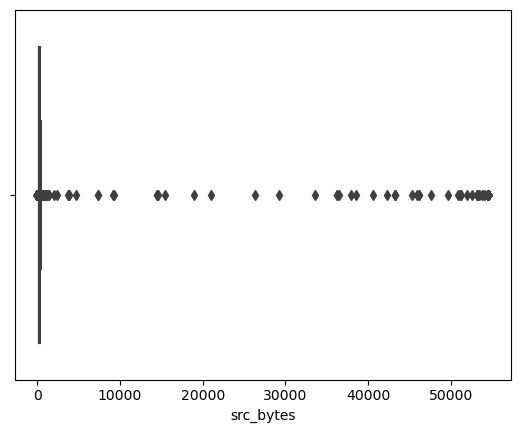

In [23]:
sns.boxplot(x='src_bytes', data = mydataset)

#### Conclusion: after checking the min max and the mean, and looking at the graph, we got to a consclusion that src_bytes distribution is not quite conclusive, but we can see that there are not much records around 8000 and 35000 which might indicate that those records be anomalies

# 3. the third thing we do is to check the dependency between every 2 columns

#### src_bytes - dst_bytes:

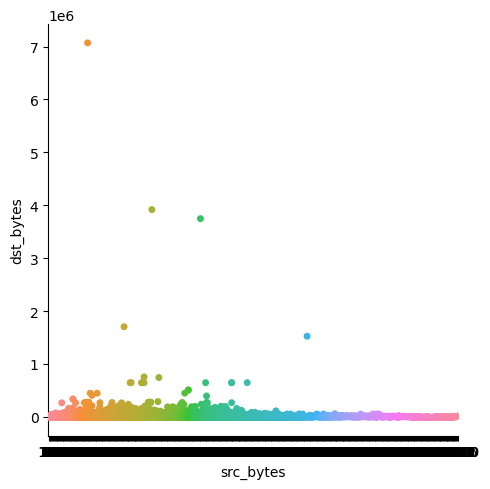

In [55]:
sns.catplot(x = 'src_bytes', y='dst_bytes', data = mydataset)

#### Conclusion: after looking the dependency graph between src_bytes and dst_bytes we can tell that the vast majority of the src_bytes have a dst_bytes around ~5000 and that the src_bytes that got dst_bytes more than that are suspected to be anomalies

#### src_bytes - Duration:

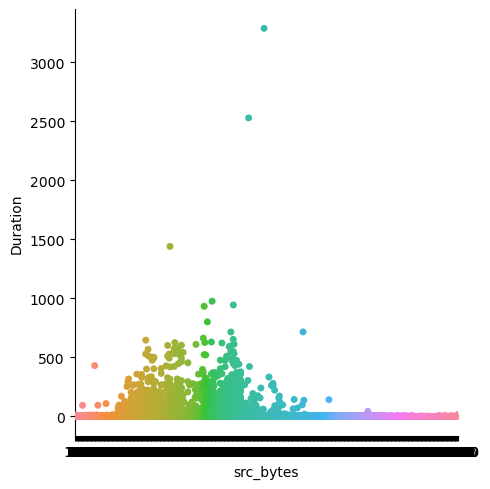

In [25]:
sns.catplot(x = 'src_bytes', y='Duration', data = mydataset)

#### Conclusion: we looked at the dependency graph of src_bytes and Duration, and from looking at the graph we can tell that the bigger the src_bytes are the less duration it has. we know that the mean of the Duration is 0.64, but in this graph we can see that there are a lot of records that have duration bigger than 0. there are records that their duration is bigger than 500 which might tell us that this is an anomaly.

#### dst_bytes - Duration:

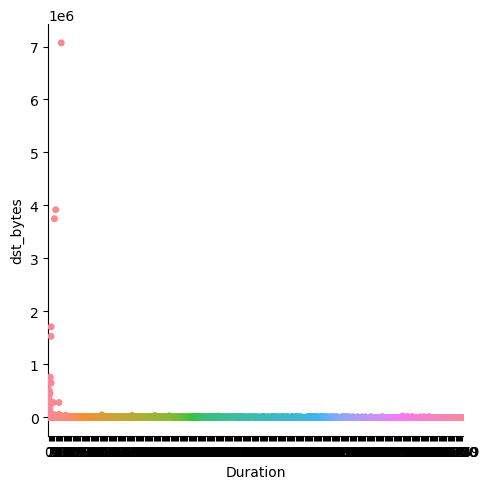

In [26]:
sns.catplot(x = 'Duration', y='dst_bytes', data = mydataset)

#### Conclusion: we looked at the dependency between duration and dst_bytes. this graph might not be the best one since the units of measurement of the dst_bytes are high, but we can still detect some anomalies, because there are records that their dst_bytes are higher than most of the records.

In [27]:
# sns.catplot(x = 'dst_bytes', y='Duration', data = mydataset)

# 4. we check the dependency of all the features together

#### src_bytes-dst_bytes /Duration

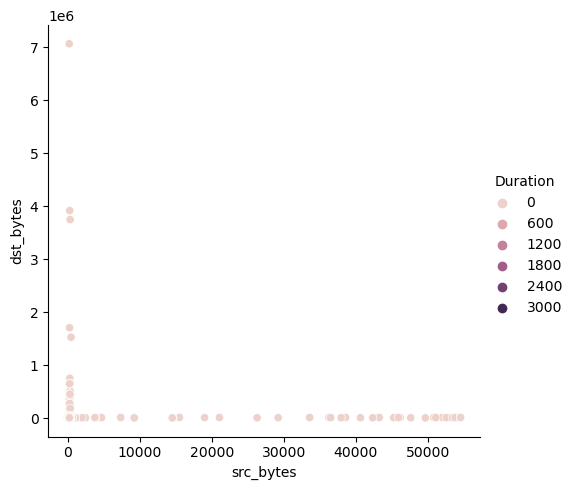

In [28]:
sns.relplot(x = 'src_bytes', y='dst_bytes', hue = 'Duration',data = mydataset)

#### Conclusion: we looked at the dependency graph of src_bytes and dst_bytes as the result are divides according to the duration feature. we can tell that almost all the results' duration is under 600, which might indicate that records that their duration is higher than 600 are anomalies. we can also tell that when the src_bytes are higher the dst_bytes are 0, and when the src_bytes are close to 0 there are some records that their dst_bytes are higher than most which might indicate that they are anomalies.

# 5. more things we checked

### we check the src+dst - Duration:

In [29]:
mydataset['sum'] = mydataset['src_bytes']+mydataset['dst_bytes']

In [30]:
mydataset

,record ID,Duration,src_bytes,dst_bytes,sum
0,1,0,236,1228,1464
1,2,0,239,486,725
2,3,0,234,1364,1598
3,4,0,239,1295,1534
4,5,0,181,5450,5631
...,...,...,...,...,...
256665,256666,0,306,236,542
256666,256667,0,288,4017,4305
256667,256668,0,289,1096,1385
256668,256669,0,198,2169,2367


#### dst_bytes/src_bytes:

In [31]:
mydataset['dst_per_src'] = mydataset['dst_bytes']/(mydataset['src_bytes']+1)

In [32]:
mydataset['dst_per_src'].min()

0.0

In [33]:
mydataset['dst_per_src'].max()

39053.91712707182

In [34]:
mydataset['dst_per_src'].mean()

18.64758115508217

<AxesSubplot:xlabel='dst_per_src'>

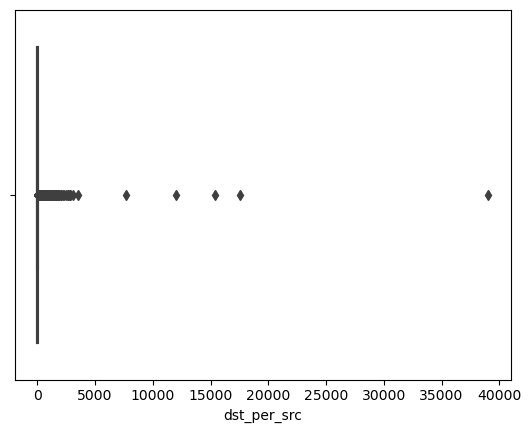

In [35]:
sns.boxplot(x='dst_per_src', data = mydataset)

#### Conclusion: we checked how many dst_bytes we got for for every 1 src_byte. according to min, max, mean and the graph we can see that most of the records got under than ~3000 bytes for 1 byte they send, which means that we the number of bytes received is higher than ~3000 this is an anomaly

# Part II - detecting anomalies

In [36]:
df = pd.read_csv('/home/eylon/Desktop/Network_traffic_anomalies_detection/conn_attack.csv')
df2 = pd.read_csv('/home/eylon/Desktop/Network_traffic_anomalies_detection/conn_attack_anomaly_labels.csv')

In [37]:
df2['pr'].value_counts()

0    255648
1      1022
Name: pr, dtype: int64

#### the number of anomalies in the file are 1022

/home/eylon/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='src_bytes', ylabel='Density'>

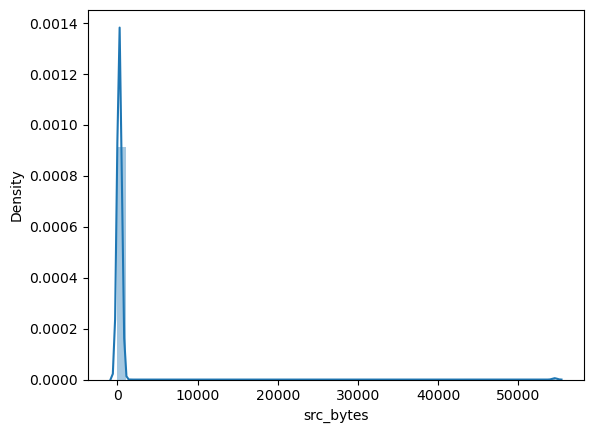

In [38]:
sns.distplot(df['src_bytes'])

#### here we can see that this is a positive skew, we want to covert it to symtrical distribution

In [39]:
df.describe()

,record ID,Duration,src_bytes,dst_bytes
count,256670.000000,256670.000000,256670.000000,2.566700e+05
mean,128335.500000,0.640936,474.247898,4.473533e+03
std,74094.391134,15.627170,3391.106084,2.080903e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,64168.250000,0.000000,217.000000,6.600000e+02
50%,128335.500000,0.000000,249.000000,1.661000e+03
75%,192502.750000,0.000000,306.000000,4.341000e+03
max,256670.000000,3289.000000,54540.000000,7.068759e+06


#### we saw that the biggest difference is in src_bytes

In [40]:
upper_limit = df['src_bytes'].mean() + 3*df['src_bytes'].std()
lower_limit = df['src_bytes'].mean() - 3*df['src_bytes'].std()
print(f"upper limit: {upper_limit}")
print(f"lower limit: {lower_limit}")

upper limit: 10647.566150488035
lower limit: -9699.070354329544


#### first we tried to use the MAD method to detect anomalies, but the results were plausible and not high. so we tries the z-score method which gave us teriffic results.

In [41]:
df.loc[(df['src_bytes'] > upper_limit) | (df['src_bytes'] < lower_limit)]

,record ID,Duration,src_bytes,dst_bytes
140814,140815,0,54540,8314
140815,140816,0,54540,8314
140816,140817,0,54540,8314
140817,140818,0,54540,8314
140818,140819,0,54540,8314
...,...,...,...,...
232764,232765,0,54540,8314
232765,232766,0,54540,8314
232766,232767,0,54540,8314
232767,232768,0,54540,8314


#### we can see that the number of records the z-score detect as anomalies is 1020 while the real number is 1022

In [42]:
df['pr2'] = 0

In [43]:
df

,record ID,Duration,src_bytes,dst_bytes,pr2
0,1,0,236,1228,0
1,2,0,239,486,0
2,3,0,234,1364,0
3,4,0,239,1295,0
4,5,0,181,5450,0
...,...,...,...,...,...
256665,256666,0,306,236,0
256666,256667,0,288,4017,0
256667,256668,0,289,1096,0
256668,256669,0,198,2169,0


In [44]:
df.pr2[(df['src_bytes'] > upper_limit) | (df['src_bytes'] < lower_limit)] = 1

In [45]:
df['pr2'].value_counts()

0    255650
1      1020
Name: pr2, dtype: int64

In [46]:
df

,record ID,Duration,src_bytes,dst_bytes,pr2
0,1,0,236,1228,0
1,2,0,239,486,0
2,3,0,234,1364,0
3,4,0,239,1295,0
4,5,0,181,5450,0
...,...,...,...,...,...
256665,256666,0,306,236,0
256666,256667,0,288,4017,0
256667,256668,0,289,1096,0
256668,256669,0,198,2169,0


#### after the algorithm detected its anomalies we added our prediction to the data frame

In [47]:
ans_df = df[['record ID', 'pr2']]

In [48]:
ans_df.to_csv('answer.csv')

In [49]:
ans_df['pr2'].value_counts()

0    255650
1      1020
Name: pr2, dtype: int64

# Comparing our prediction and the actual result

In [50]:
pred = pd.read_csv('/home/eylon/Desktop/Network_traffic_anomalies_detection/answer.csv')
ans = pd.read_csv('/home/eylon/Desktop/Network_traffic_anomalies_detection/conn_attack_anomaly_labels.csv')

In [51]:
result = pred.merge(ans)[['pr', 'pr2']]
result.value_counts()

pr  pr2
0   0      255644
1   1        1016
    0           6
0   1           4
dtype: int64

In [52]:
true_positive= len(result[(result['pr'] == 0) & (result['pr2'] == 0)])
true_negative = len(result[(result['pr'] == 1) & (result['pr2'] == 1)])
false_positive = len(result[(result['pr'] == 1) & (result['pr2'] == 0)])
false_negative = len(result[(result['pr'] == 0) & (result['pr2'] == 1)])

In [53]:
print(true_positive)
print(true_negative)
print(false_positive)
print(false_negative)

255644
1016
6
4


# Task Answers

## Question 1

## Answer:

we learned that when looking at each feature individually, there are some records that their points are not in the same "area" as the other points.

we calculated the min, max and mean of every feature and some features as their dependencies in one another, and we noticed few points that we might consider anomalies.

when we looked at the src_bytes feature we noticed some records that their points arent in the same zone as the other. we decided to explore this feature because we believe that the anomaly is very much affected by the src_bytes feature. we looked at the dst_bytes for every src_byte and we detected some anomalies. we chose to explore this feature because we believe that there isnt a reason for the src_bytes to be so big, because most of the records contain src_bytes that they might be requests and it should be high (because it isnt a server), and if the src_bytes are a large number it might indicate anomaly.

Furthermore, we wrote conclusions in the notebook after each feature inspection.

## Question 2

## Answer:

The algorithms group we found suitable are the unsupervised algorithms. since we dont have classifiction of which data is good and which is anomaly, we need to use an unsupervised algorithm to detect anomalies.
The algorithm we used to detect anomalies in the data is Z-SCORE algorithm.

## Question 3

## Answer:

After searching the internet for algorithms that will solve our problem we tried to use the MAD method to detect anomalies but the numbers it gave us werent so great. so, we decided to use the Z-SCORE method to detect anomalies and the results we got were excellent. we decided to use those methods because when we looked at the skew of the src_bytes feature it was a positive skew, so we saw that the tail is very long. so we decided that there are outliers in the data, and we can count them as anomalies.
we know that the algorithm we used is good because when we set boundries we got a symetrical distribution, and then we compared the records we detected as anomlaies with the answers, and saw that we got great results.

## Question 4

## Answer:

In [59]:
recall = (true_positive) / (true_positive + false_negative)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
precision = (true_positive) / (true_positive + false_positive)
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Recall: 0.9999843534860433
Accuracy: 0.9999610394670199
Precision: 0.9999765304126735


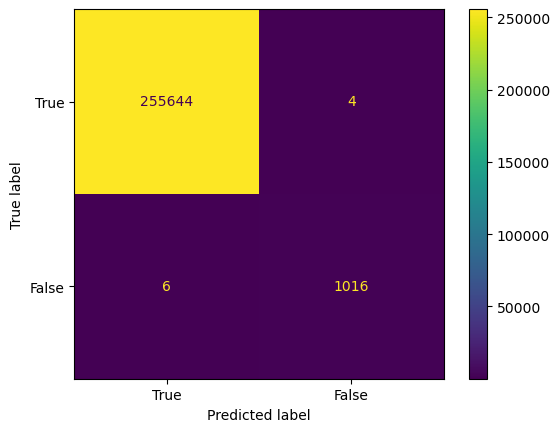

In [56]:

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = pd.read_csv('/home/eylon/Desktop/Network_traffic_anomalies_detection/answer.csv')
predicted = pd.read_csv('/home/eylon/Desktop/Network_traffic_anomalies_detection/conn_attack_anomaly_labels.csv')

confusion_matrix = metrics.confusion_matrix(predicted['pr'], actual['pr2'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show() 